In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('diabetes.csv', sep=';')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


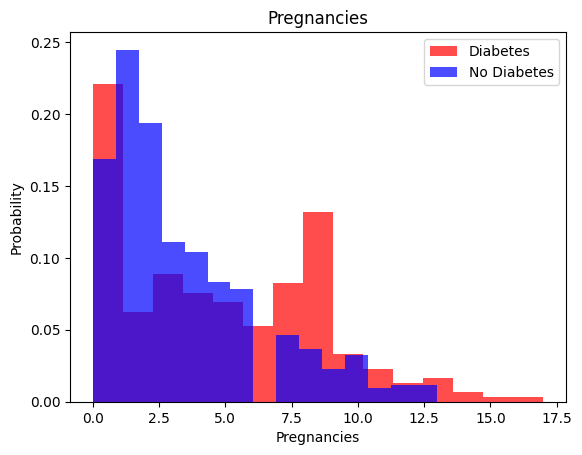

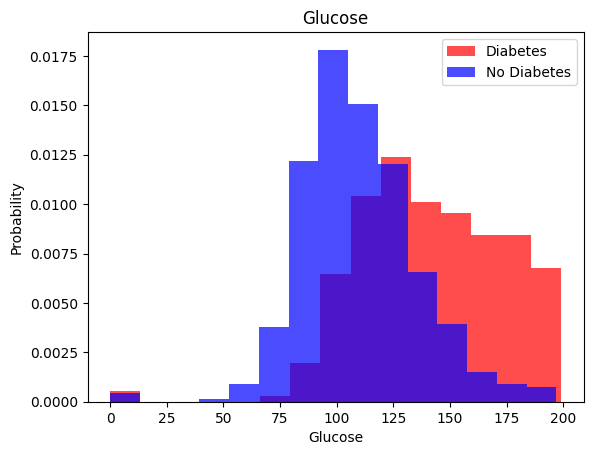

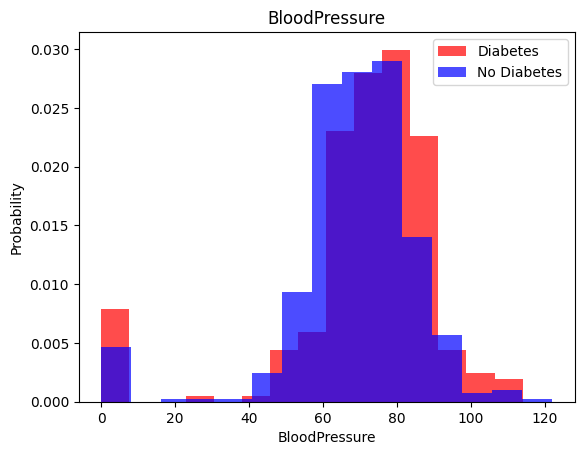

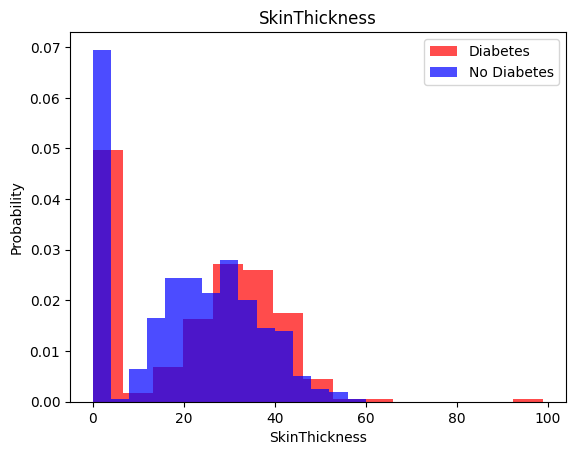

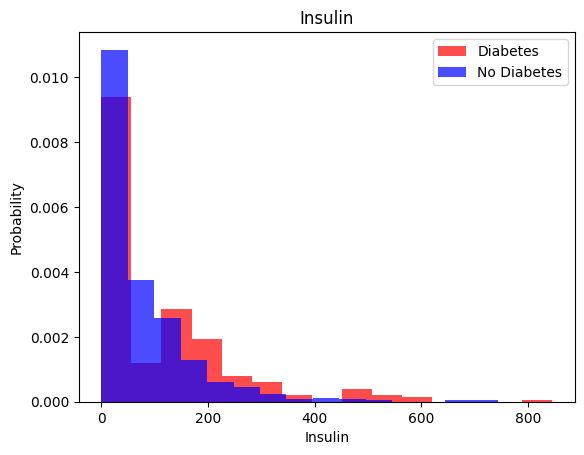

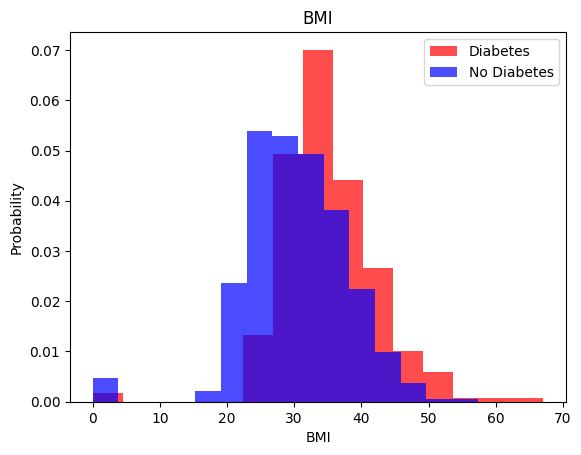

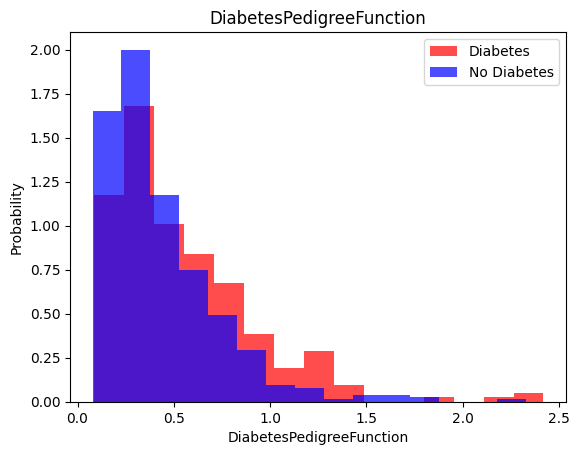

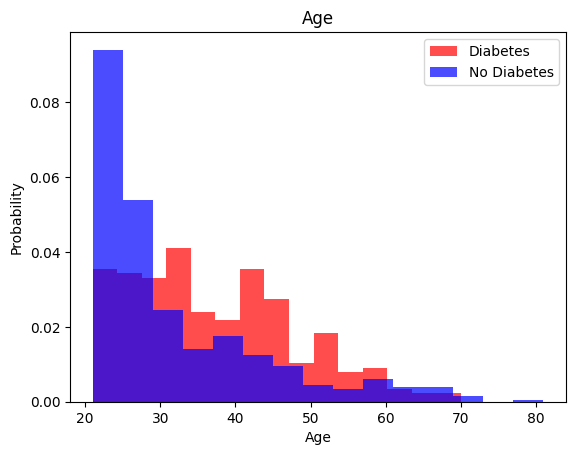

In [4]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='red',label='Diabetes', alpha=0.7, density=True,bins=15)
    plt.hist(df[df['Outcome']==0][label], color='blue',label='No Diabetes', alpha=0.7, density=True,bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [5]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

In [7]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

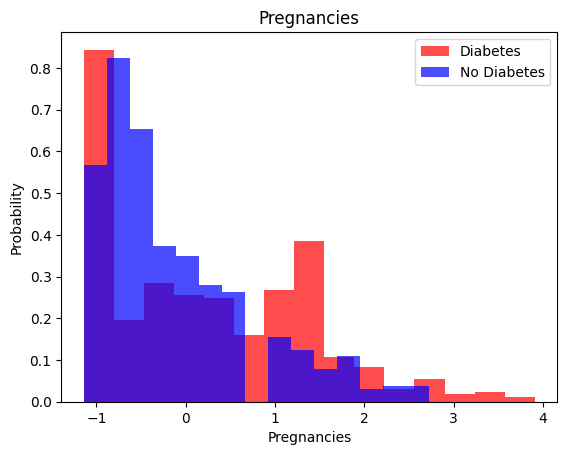

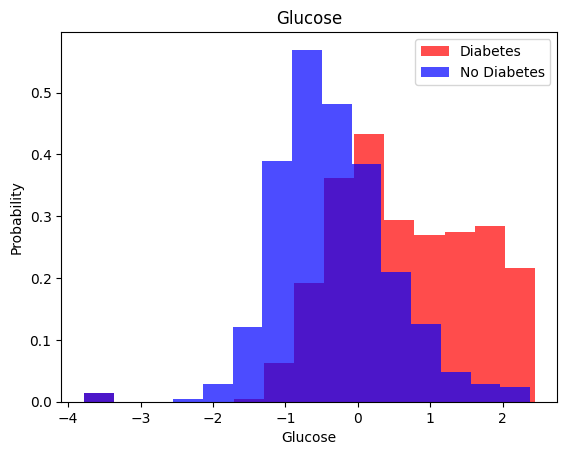

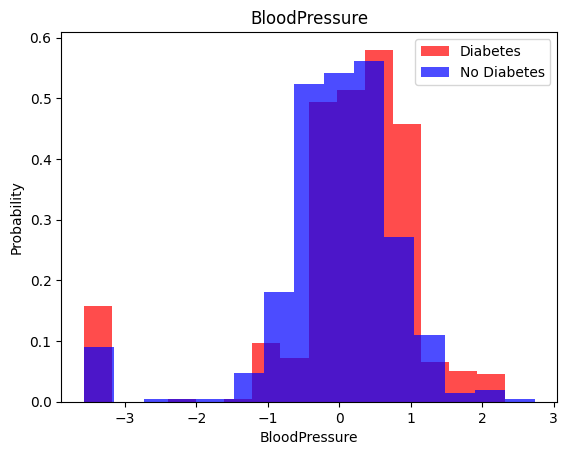

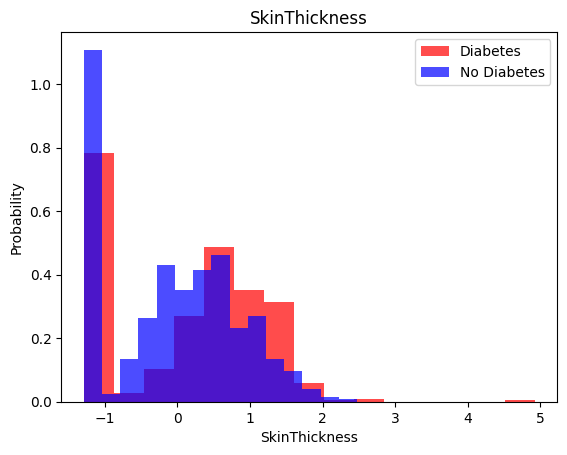

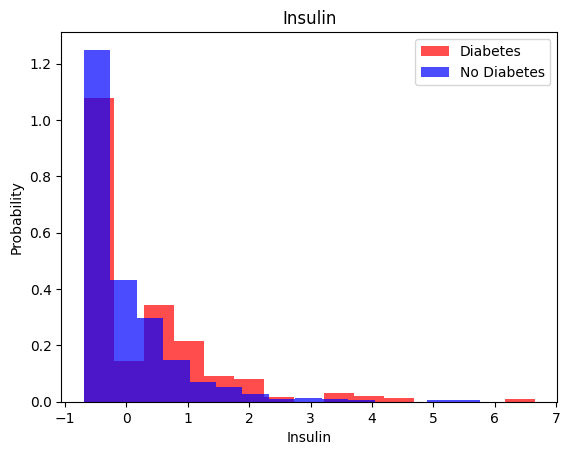

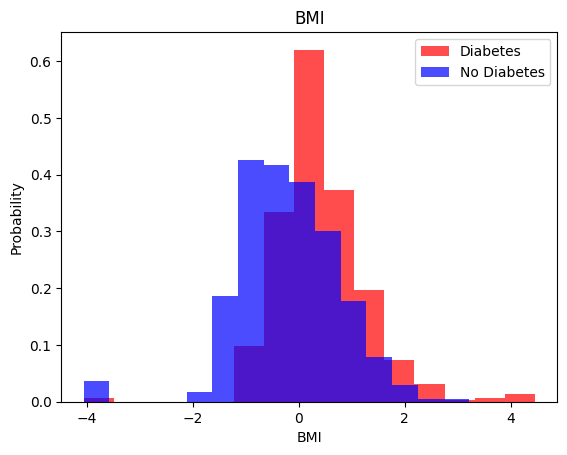

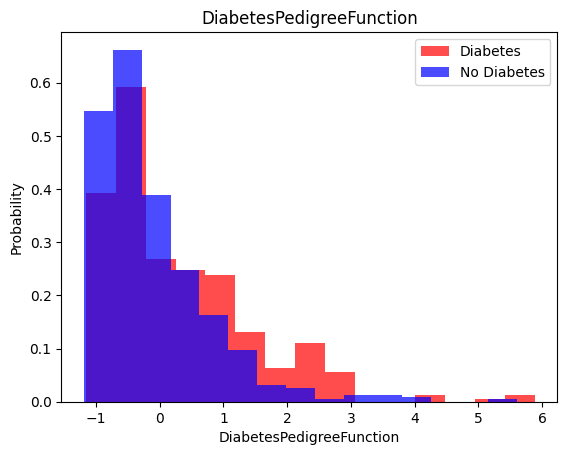

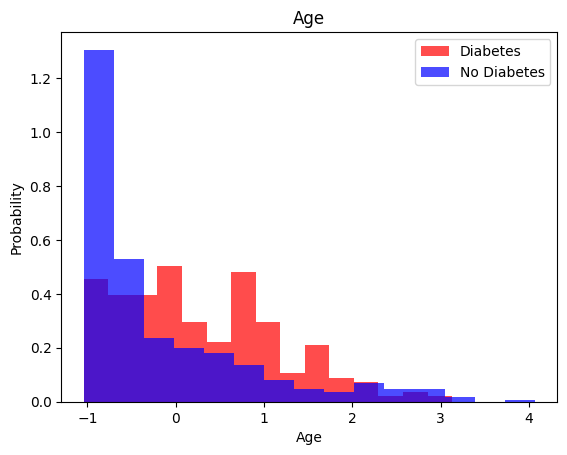

In [8]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='red',label='Diabetes', alpha=0.7, density=True,bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='blue',label='No Diabetes', alpha=0.7, density=True,bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [13]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5150


[0.6922759413719177, 0.5149999856948853]

In [14]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.4950


[0.7076627612113953, 0.4950000047683716]

In [15]:
model.fit(X_train, y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 2ms/step - loss: 0.6638 - accuracy: 0.5967 - val_loss: 0.6367 - val_accuracy: 0.6250
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7000 - val_loss: 0.6028 - val_accuracy: 0.7000
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7333 - val_loss: 0.5750 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7417 - val_loss: 0.5508 - val_accuracy: 0.7250
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.7383 - val_loss: 0.5304 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7400 - val_loss: 0.5170 - val_accuracy: 0.7400
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7467 - val_loss: 0.5048 - val_accuracy: 0.7450
Epoch 8/20
38/38 [==

In [16]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 700us/step - loss: 0.4826 - accuracy: 0.7800


[0.4826130270957947, 0.7799999713897705]